#Diagramas de Fase limites Cíclicos

In [ ]:
from ipywidgets.widgets import *
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
import sys
import sympy as sym
from google.colab import widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

#Ejemplo 1

$$\begin{equation}
\left(\begin{matrix}
x\\
y 
\end{matrix}\right)'
=\left(\begin{matrix}
x+y - x [x^2 + y^2] \\
-x+y-y[x^2+y^2]\\
\end{matrix}\right)
\end{equation}$$

$rdr=r(1-r^2)$

Donde $$r=\frac{1}{\sqrt{(1+[1/\rho^2-1]e^{-2t})}}$$
y
$$\theta=-(t-\alpha)$$


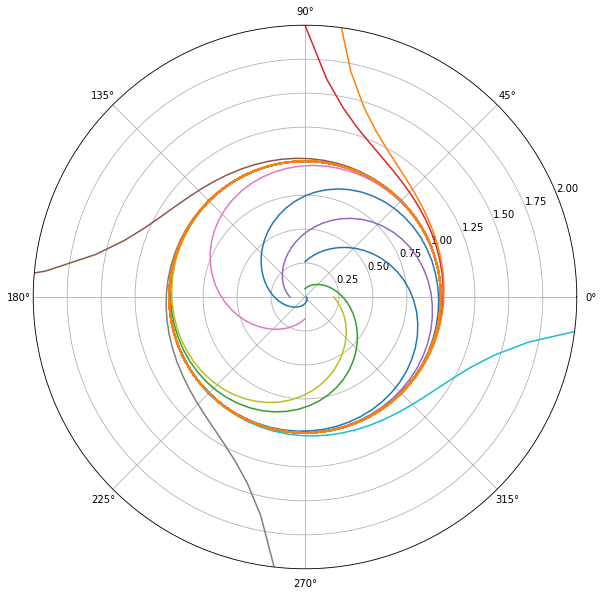

In [ ]:
plt.figure(figsize=(10,10))
def example1_r(rho,alpha):
  t=np.linspace(0,100,1000)
  r=1/((np.sqrt(1+((1/(rho**2))-1)*np.exp(-2*t))))
  theta=-(t-alpha)
  return theta,r
for i in range(6):
  rho=i*0.05+0.01
  alpha=np.pi*i/2
  theta,r=example1_r(rho,alpha)
  plt.polar(theta,r)
  rho=i+1
  theta,r=example1_r(rho,alpha)
  plt.polar(theta,r)
  plt.ylim([0,2])

#Ejemplo 2
Ecuación de van der Pol

$u''-\mu(1-u^2)u'+u=0$

In [ ]:
global mu
def sistem_nl(conditions,tiempo):
  x,y=conditions
  dx=y
  dy=-x+mu*(1-x**2)*y
  return [dx,dy]
def EDO_r (conditions,theta):
  r=conditions
  dr=mu*(1-r**2*np.cos(theta)**2)*r*np.sin(theta)**2
  return dr
def solution(value):
  global mu
  mu=value
  plt.figure(figsize=(10,10))
  theta=np.linspace(0,20*np.pi,1000)
  r=odeint(EDO_r,0.1,theta)
  theta=np.pi-theta
  plt.polar(theta,r)
  plt.ylim([0,4.5])
  theta=np.linspace(0,20*np.pi,1000)
  r=odeint(EDO_r,4,theta)
  theta=np.pi-theta
  plt.polar(theta,r)
  plt.ylim([0,4.5])
  plt.show()
  return
interact(solution,value=widgets.FloatSlider(min=0, max=2, step=0.2, value=0.2))


interactive(children=(FloatSlider(value=0.2, description='value', max=2.0, step=0.2), Output()), _dom_classes=…

<function __main__.solution>